In [1]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')

In [2]:
# Checking the encoding of the csv files
with open('C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_users.csv', encoding='ISO-8859-1') as f:
    print(f)
    #for text in f:
        #print(text)
with open('C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_user_engagement.csv', encoding='ISO-8859-1') as f:
    print(f)

<_io.TextIOWrapper name='C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_users.csv' mode='r' encoding='ISO-8859-1'>
<_io.TextIOWrapper name='C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_user_engagement.csv' mode='r' encoding='ISO-8859-1'>


In [3]:
# Importing the csv file into a dataframe using the above encoding

# load as Pandas dataframe

users = pd.read_csv('C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_users.csv', encoding='ISO-8859-1', parse_dates = ['creation_time']) 
                    

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ï»¿object_id                12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
user_eng = pd.read_csv('C:\\Users\\sonia\\Downloads\\1481069814_relax_challenge\\relax_challenge\\takehome_user_engagement.csv', encoding = 'ISO-8859-1',parse_dates = ['ï»¿time_stamp'])

In [6]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ï»¿time_stamp  207917 non-null  datetime64[ns]
 1   user_id        207917 non-null  int64         
 2   visited        207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# Generating summary of users dataframe

users.describe().T

,count,mean,min,25%,50%,75%,max,std
ï»¿object_id,12000.0,6000.5,1.0,3000.75,6000.5,9000.25,12000.0,3464.24595
creation_time,12000,2013-07-16 13:25:03.455000064,2012-05-31 00:43:00,2013-01-15 21:27:45,2013-08-05 21:35:00,2014-01-28 10:19:45,2014-05-30 23:59:00,NaN
last_session_creation_time,8823.0,1379279305.700442,1338452406.0,1363194965.0,1382888470.0,1398442604.0,1402066730.0,19531160.787044
opted_in_to_mailing_list,12000.0,0.2495,0.0,0.0,0.0,0.0,1.0,0.432742
enabled_for_marketing_drip,12000.0,0.149333,0.0,0.0,0.0,0.0,1.0,0.356432
org_id,12000.0,141.884583,0.0,29.0,108.0,238.25,416.0,124.056723
invited_by_user_id,6417.0,5962.957145,3.0,3058.0,5954.0,8817.0,11999.0,3383.761968


Users dataframe shows there are 12000 users.

In [8]:
# Viewing users dataframe

users.head()

,ï»¿object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
# Number of distict names of users

users.name.nunique()

11355

In [10]:
# Finding missing values of users

users.isnull().sum()

ï»¿object_id                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

Missing values identified in Last_session_creation_time column and invited_by_user_id column

In [11]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ï»¿time_stamp  207917 non-null  datetime64[ns]
 1   user_id        207917 non-null  int64         
 2   visited        207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
# Generating summary of user_eng dataframe

user_eng.describe().T

,count,mean,min,25%,50%,75%,max,std
ï»¿time_stamp,207917,2013-10-30 05:06:16.139517184,2012-05-31 08:20:00,2013-07-16 20:17:00,2013-12-03 06:38:00,2014-03-13 08:00:00,2014-06-06 14:58:00,NaN
user_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
visited,207917.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [13]:
# Viewing user_eng dataframe

user_eng.head()

,ï»¿time_stamp,user_id,visited
0,2014-04-22 03:53:00,1,1
1,2013-11-15 03:45:00,2,1
2,2013-11-29 03:45:00,2,1
3,2013-12-09 03:45:00,2,1
4,2013-12-25 03:45:00,2,1


In [14]:
# Finding missing values of user_eng

user_eng.isnull().sum()

ï»¿time_stamp    0
user_id          0
visited          0
dtype: int64

No missing columns found in user_eng

In [15]:
user_eng.user_id.nunique()

8823

Converting the _last_session_creation_time_ column in the users column to datetime.

In [16]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'] ,unit='s')

In [17]:
users.last_session_creation_time.dtypes

dtype('<M8[ns]')

In [18]:
users.head(3)

,ï»¿object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0


In [19]:
# Finding the first and last last_session_creation_time

users['last_session_creation_time'].min(), users['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [20]:
# Finding the first and last creation time

users['creation_time'].min(), users['creation_time'].max()

(Timestamp('2012-05-31 00:43:00'), Timestamp('2014-05-30 23:59:00'))

In [21]:
# Making a copy of uer_eng

eng_copy = user_eng.copy()

In [22]:
# Changing date column of the copy to datetime

eng_copy['date'] = pd.to_datetime(eng_copy['ï»¿time_stamp'].dt.date)

In [23]:
# Defining a function to identify adopted users using rolling and groupby

def rolling_count(eng_copy_group, frequency):
    return eng_copy_group.rolling(frequency, on='date')['user_id'].count()

In [24]:
eng_copy['visits_within_7_days'] = eng_copy.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [25]:
eng_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
ï»¿time_stamp,207917,2013-10-30 05:06:16.139517184,2012-05-31 08:20:00,2013-07-16 20:17:00,2013-12-03 06:38:00,2014-03-13 08:00:00,2014-06-06 14:58:00,NaN
user_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
visited,207917.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
date,207917,2013-10-29 16:42:23.861252352,2012-05-31 00:00:00,2013-07-16 00:00:00,2013-12-03 00:00:00,2014-03-13 00:00:00,2014-06-06 00:00:00,NaN
visits_within_7_days,207917.0,4.381393,1.0,3.0,4.0,6.0,7.0,2.042666


In [26]:
eng_copy[eng_copy.visits_within_7_days >= 3.0]

,ï»¿time_stamp,user_id,visited,date,visits_within_7_days
9,2014-02-09 03:45:00,2,1,2014-02-09,3.0
10,2014-02-13 03:45:00,2,1,2014-02-13,3.0
27,2013-02-19 22:08:00,10,1,2013-02-19,3.0
30,2013-03-02 22:08:00,10,1,2013-03-02,3.0
31,2013-03-05 22:08:00,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:00,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:00,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:00,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:00,11988,1,2014-05-27,5.0


Defining adopted user and one who visits site at least three times or more within a 7 day period

In [27]:
adopted = eng_copy.groupby('user_id')['visits_within_7_days'].max().reset_index()

In [28]:
# Label 1 if visits at least 3 times within a 7 days time period and 0 is visits less than 3 times within 7 days time period

adopted['adopted_user'] = adopted['visits_within_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [29]:
adopted.head()

,user_id,visits_within_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [30]:
# Finding number of adopted users vs non adpoted users

adopted.adopted_user.value_counts()

adopted_user
0    7221
1    1602
Name: count, dtype: int64

In [31]:
# Adding new relevant columns of the copy dataframe to original user dataframe

# Dropping irrelevant column from copy 

adopted.drop('visits_within_7_days', axis = 1, inplace = True)

# Renaming user_id as object_id 

adopted.rename(columns={"user_id": "object_id"}, inplace=True)

# Setting object_id as index

adopted.set_index("object_id", inplace = True)

In [32]:
adopted.head()

,adopted_user
object_id,
1,0
2,1
3,0
4,0
5,0


In [33]:
# Merging adopted to users dataframe 

new_users = users.join(adopted, on = 'ï»¿object_id', how='left')

In [34]:
new_users.head()

,ï»¿object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [35]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ï»¿object_id                12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [36]:
# Viewing missing values

new_users.isnull().sum()

ï»¿object_id                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [37]:
# Dropping last_session_creation_time because it was used to create adopted user column

new_users.drop(columns=['last_session_creation_time'], axis=1, inplace=True)

In [38]:
# Replacing missing values with 0 because it can be assumed these are not users

new_users['adopted_user'].fillna(0, inplace = True)
new_users['invited_by_user_id'].fillna(0, inplace = True)

Converting categorical numbers to numerical prior to modelling

In [39]:
# Extracting domain and identifying unique domain in email column

new_users['email_domain'] = new_users.email.apply(lambda x: x.split('@')[1])

In [40]:
# Number of unique domains

new_users['email_domain'].nunique()

1184

In [41]:
new_users['email_domain'].value_counts()

email_domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: count, Length: 1184, dtype: int64

Looks like a lot of fake domains. It will be unnecessary to convert to numerical column so the entire column will be dropped.Other irrelevant categorical columns like the name, email and object id will be dropped as well. 

In [42]:
new_users.drop(['ï»¿object_id', 'name', 'email', 'email_domain'], axis = 1, inplace = True)

In [43]:
# inspect the creation source column
# Finding number of unique creation sources

new_users.creation_source.nunique()

5

In [44]:
new_users.creation_source.value_counts()

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

In [45]:
#Encode creation_source column

new_users = pd.get_dummies(new_users, columns=['creation_source'])

In [46]:
# Handling datetime column'creation_time'
# Extracting and creating a new column days after creation 

new_users['days_after_creation'] = (user_eng['ï»¿time_stamp'].max() - new_users.creation_time).dt.days

In [47]:
# Dropping creation_time

new_users.drop(columns='creation_time', axis=1, inplace=True)

In [48]:
new_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,days_after_creation
0,1,0,11,10803.0,0.0,True,False,False,False,False,45
1,0,0,1,316.0,1.0,False,True,False,False,False,203
2,0,0,94,1525.0,0.0,False,True,False,False,False,443
3,0,0,1,5151.0,0.0,True,False,False,False,False,381
4,0,0,193,5240.0,0.0,True,False,False,False,False,505


In [49]:
new_users.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.691333,3869.027693,0.0,0.0,875.0,6317.00,11999.0
adopted_user,12000.0,0.133500,0.340128,0.0,0.0,0.0,0.00,1.0
days_after_creation,12000.0,324.568167,216.646152,6.0,129.0,304.0,506.00,736.0


Correlation between various features


<Axes: >

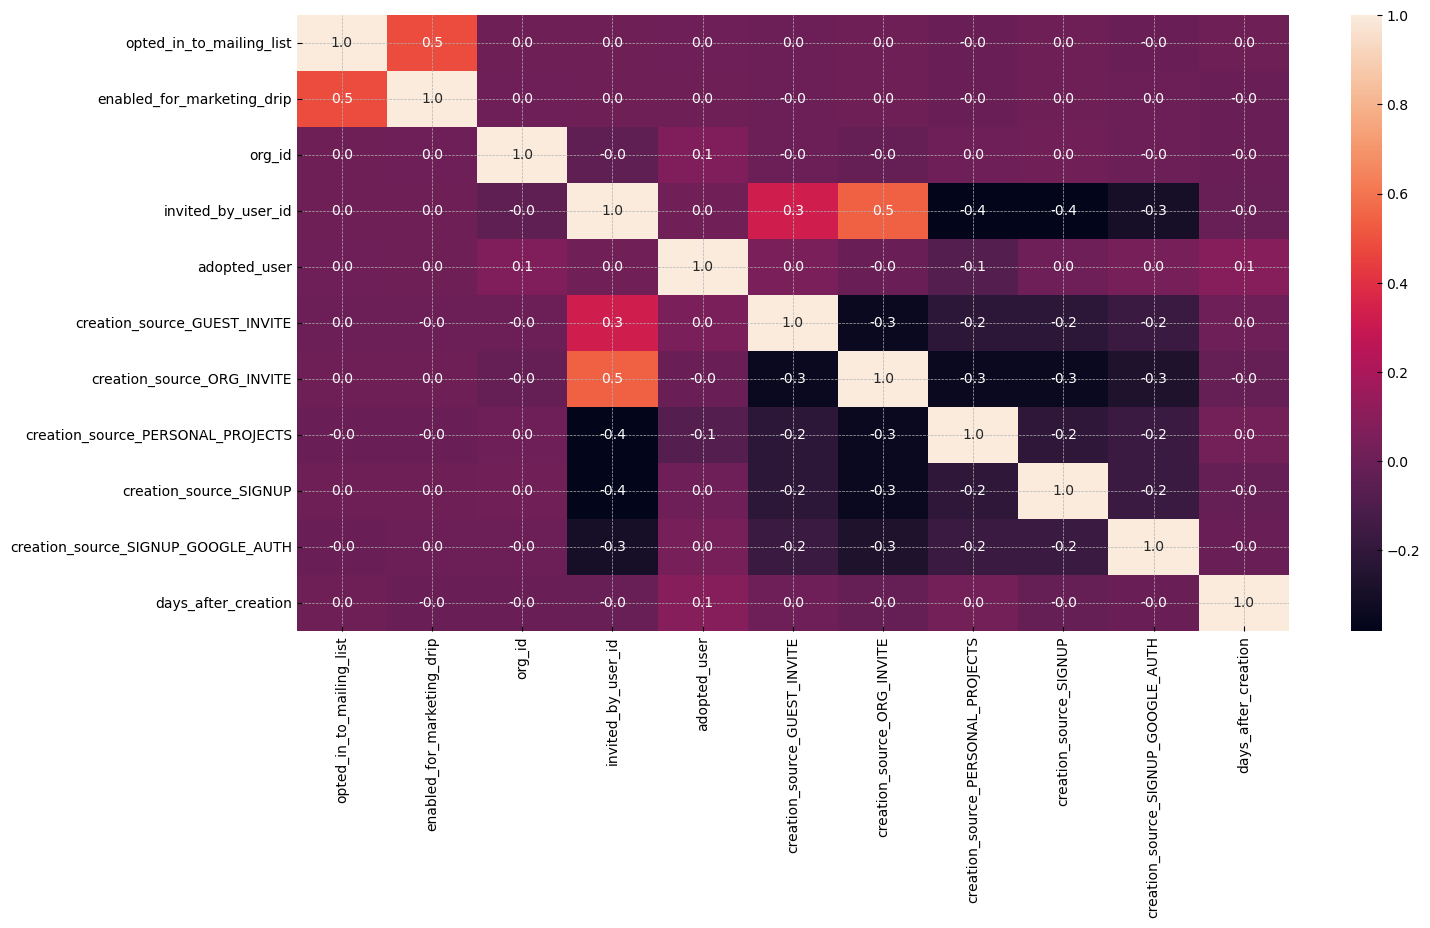

In [50]:
# Visualize correlations

corr = new_users.corr()
plt.figure(figsize=(16,8))
print('Correlation between various features')
sns.heatmap(corr, annot=True, fmt=".1f")

Predicting adopted user with a classification machine model predictor. For this project will be using Random Forest model

In [51]:
# Importing modelling libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,\
precision_score, recall_score, f1_score

In [52]:
# Defining X nad y variables

X= new_users.drop(columns=['adopted_user'])
y= new_users['adopted_user']


In [53]:
# Splitting train, test sets into 80:20

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [54]:
# Defining RF model

RF= RandomForestClassifier(n_estimators = 8)

In [55]:
# Fitting model 

RF.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=8)

In [56]:
# Making predictions

pred = RF.predict(Xtest)

In [57]:
y_pred = RF.predict(Xtest)
y_pred_prob = RF.predict_proba(Xtest)


# Assessing RF model

ac = accuracy_score(ytest, y_pred)

f1 = f1_score(ytest, y_pred, average='weighted')
cm = confusion_matrix(ytest, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.855
Random Forest: f1-score=0.810


In [58]:
print(cm)

[[2041   47]
 [ 300   12]]


In [59]:
# Printing Classification Report

class_report = classification_report(ytest, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      2088
         1.0       0.20      0.04      0.06       312

    accuracy                           0.86      2400
   macro avg       0.54      0.51      0.49      2400
weighted avg       0.78      0.86      0.81      2400



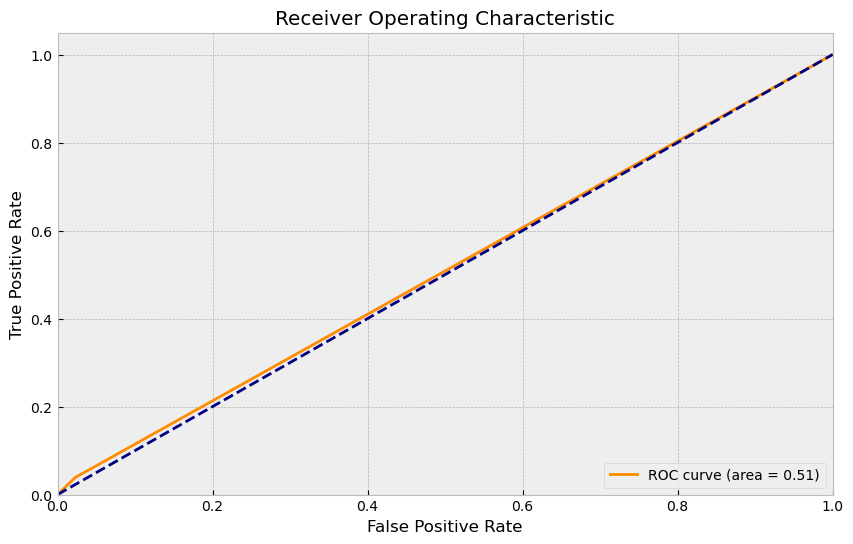

In [60]:
# ROC curve
y_score = RF.predict_proba(Xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

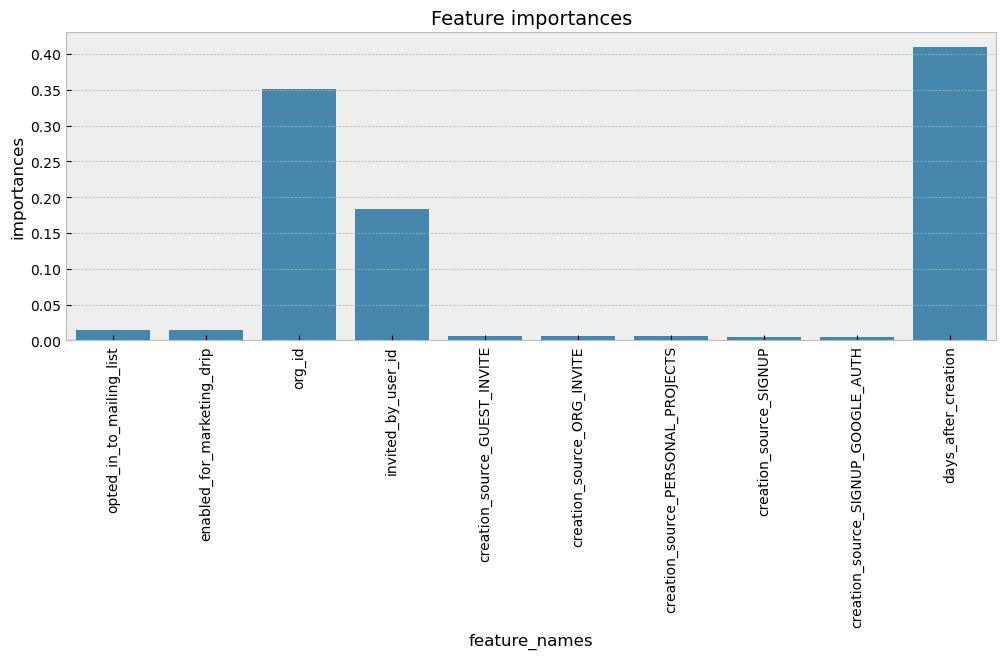

In [61]:
# Feature Importance
importances_df = pd.DataFrame({"feature_names" : RF.feature_names_in_, 
                               "importances" : RF.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(12, 4))
g = sns.barplot(x=importances_df["feature_names"], 
                y=importances_df["importances"])
plt.xticks(rotation=90)
g.set_title("Feature importances", fontsize=14);

Important features are, 
1. days_after_creation
2. org_id
3. invited_by_user_id
4. opted_in_to_mailing_list
5. enabled_for_marketing_drip